In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

from src.data_ingestion import *
from src.data_preprocessing import *
from src.feature_engineering import *

from src.visualization import *
from pyspark.sql import DataFrame
from pyspark.sql.functions import col
from pyspark.sql.types import NumericType, StringType
from pyspark.sql import functions as F

import seaborn as sns

import numpy as np

from itertools import combinations

from scipy import stats

import matplotlib.pyplot as plt

import pandas as pd



In [2]:
spark = init_spark()
df = load_data(spark)
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

## Cleaning Data

In [3]:
# df = preprocess_data(spark,df)

In [4]:
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Severity: integer (nullable = true)
 |-- Start_Time: timestamp (nullable = true)
 |-- End_Time: timestamp (nullable = true)
 |-- Start_Lat: double (nullable = true)
 |-- Start_Lng: double (nullable = true)
 |-- End_Lat: double (nullable = true)
 |-- End_Lng: double (nullable = true)
 |-- Distance(mi): double (nullable = true)
 |-- Description: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- City: string (nullable = true)
 |-- County: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zipcode: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Timezone: string (nullable = true)
 |-- Airport_Code: string (nullable = true)
 |-- Weather_Timestamp: timestamp (nullable = true)
 |-- Temperature(F): double (nullable = true)
 |-- Wind_Chill(F): double (nullable = true)
 |-- Humidity(%): double (nullable = true)
 |-- Pressure(in): double (nullable = true)
 |-- V

C:\Users\Ahmed Osama\AppData\Local\Temp\ipykernel_34484\1180773174.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_pd, palette='viridis', ax=axes[plot_idx])


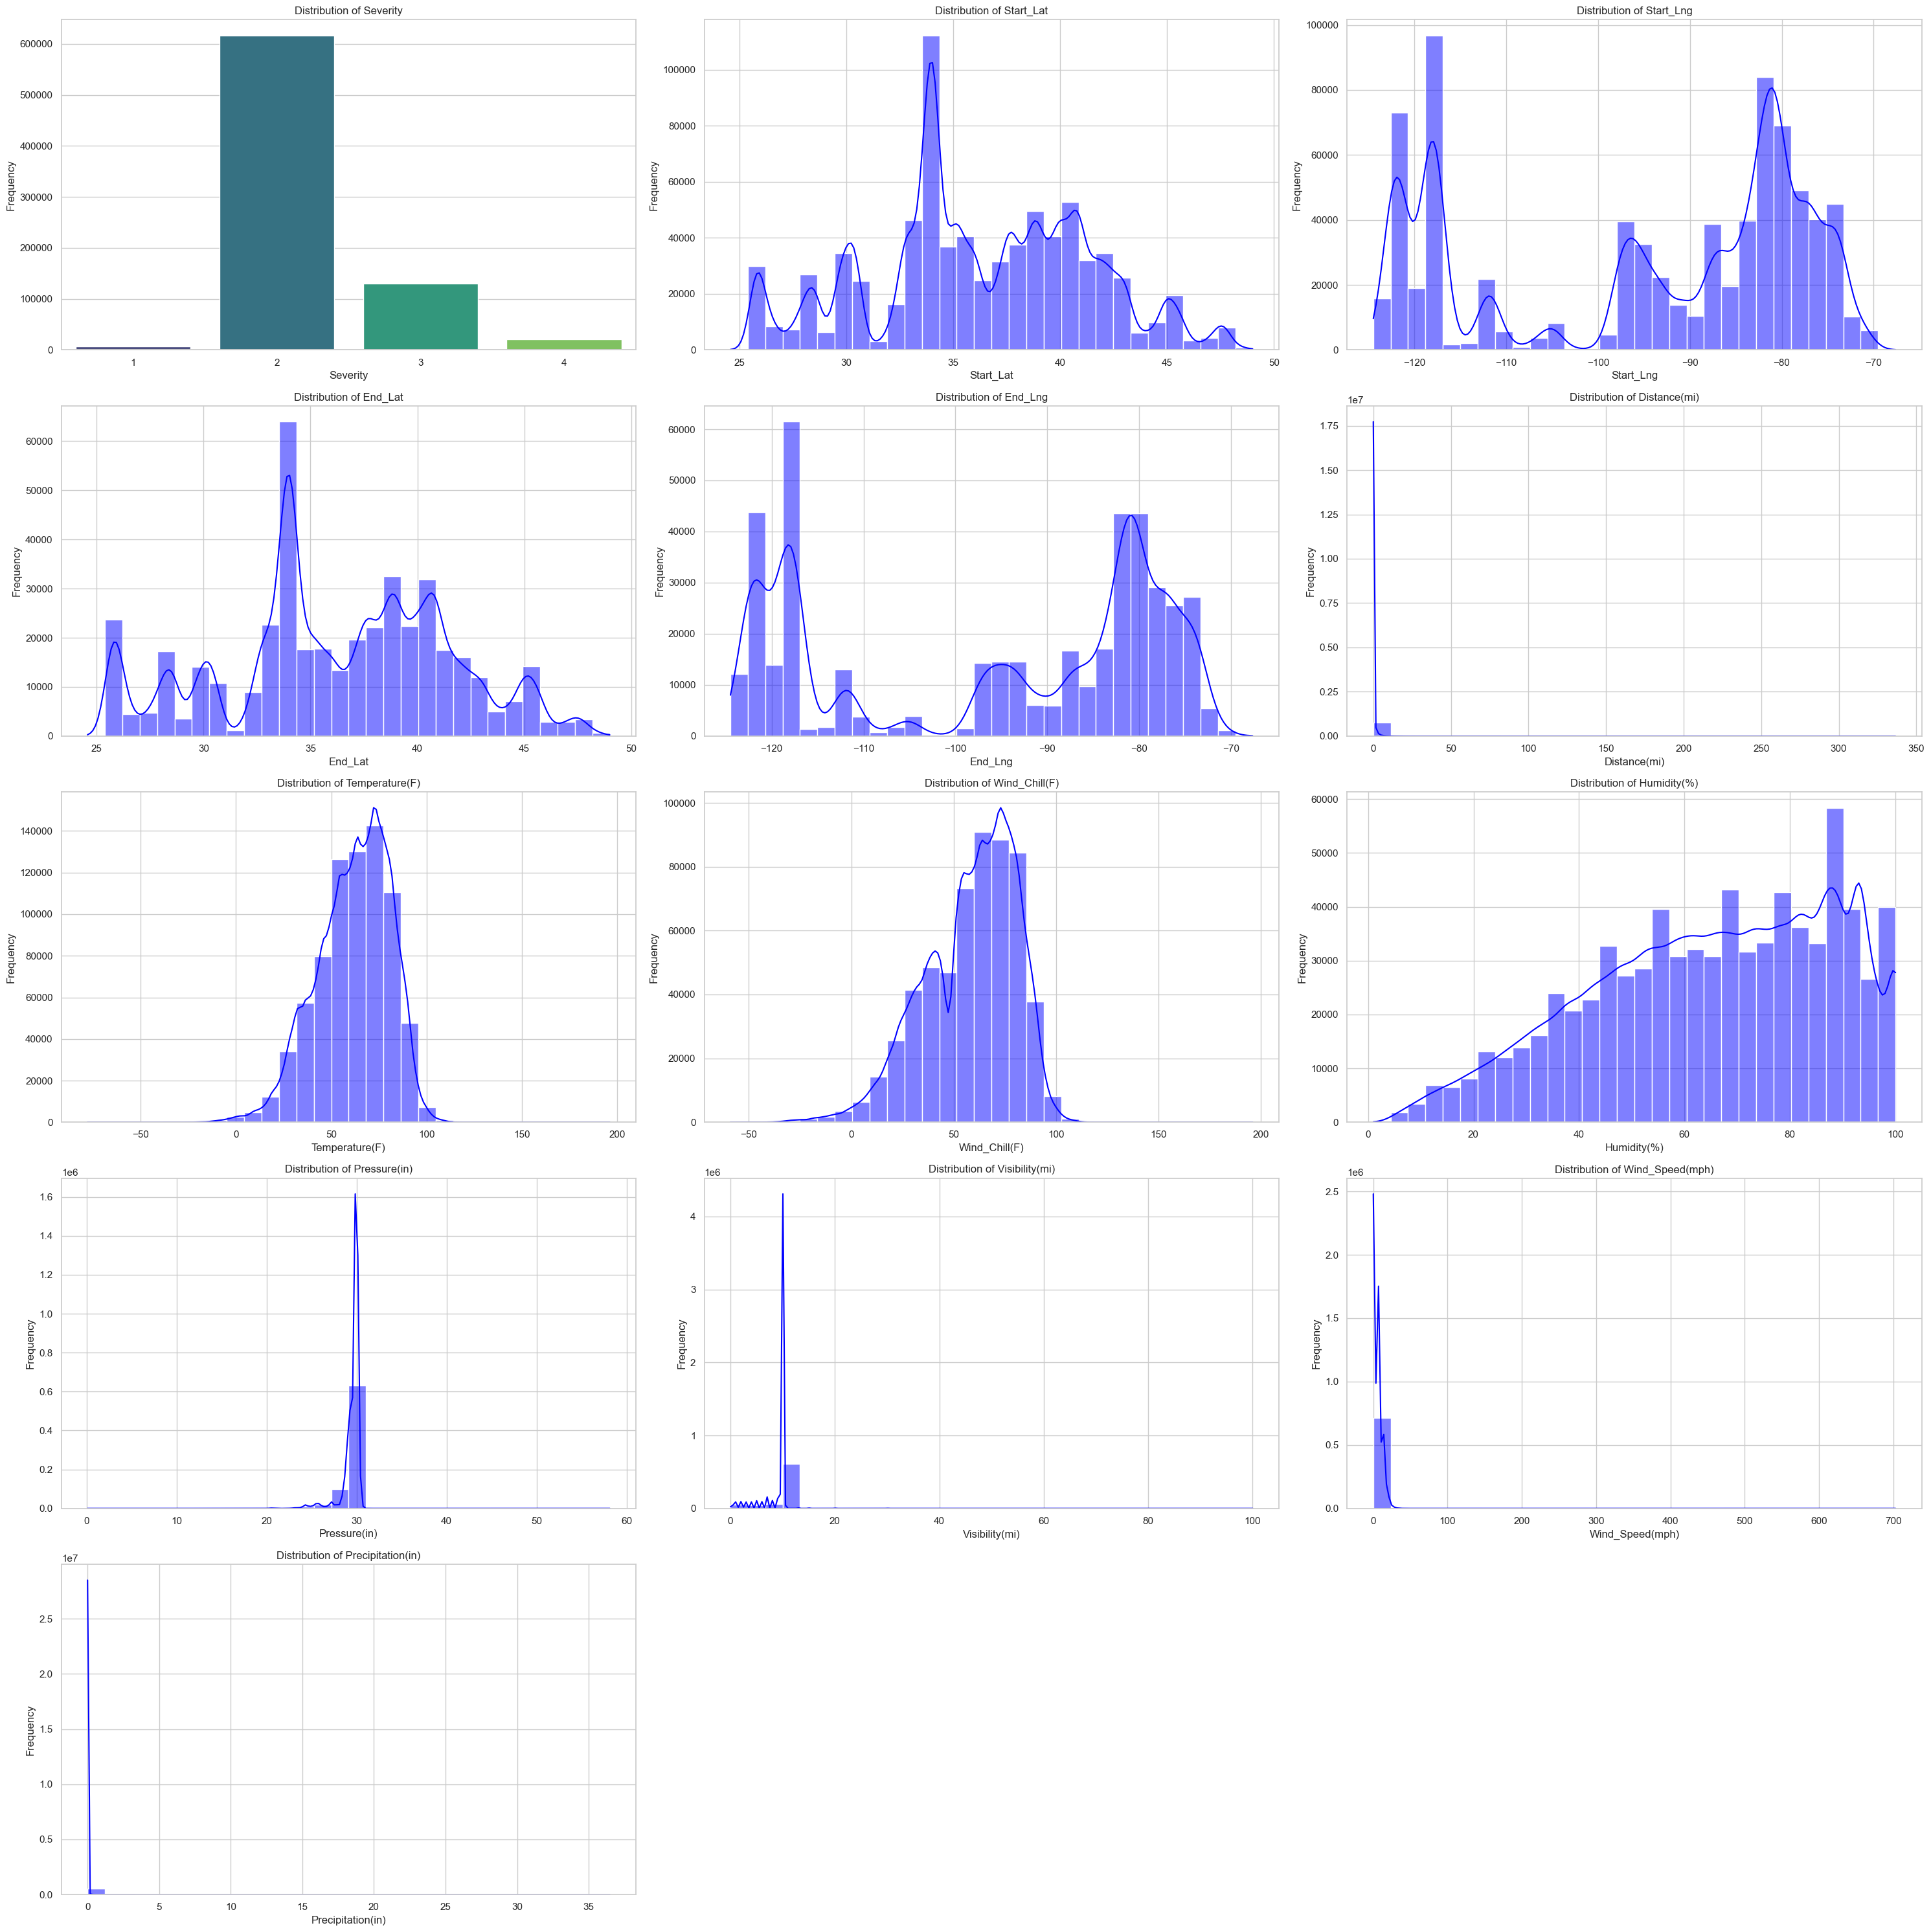

In [5]:
target_columns = ["Severity"]

df_sample = df.sample(fraction=0.1, seed=42)
df_pd = df_sample.toPandas()

sns.set(style="whitegrid")

numeric_cols = df_pd.select_dtypes(include=['float64', 'int64']).columns
total_plots = len(target_columns) + len(numeric_cols)

cols = min(total_plots, 3)
rows = (total_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows), squeeze=False)
axes = axes.flatten()

plot_idx = 0

for col in target_columns:
    sns.countplot(x=col, data=df_pd, palette='viridis', ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Distribution of {col}")
    axes[plot_idx].set_xlabel(col)
    axes[plot_idx].set_ylabel("Frequency")
    plot_idx += 1

for col in numeric_cols:
    sns.histplot(df_pd[col], kde=True, color='blue', bins=30, ax=axes[plot_idx])
    axes[plot_idx].set_title(f"Distribution of {col}")
    axes[plot_idx].set_xlabel(col)
    axes[plot_idx].set_ylabel("Frequency")
    plot_idx += 1

for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()